# Explore here

In [1]:
#About Dataset:
#Source: JOAKIM ARVIDSSON, https://www.kaggle.com/datasets/joebeachcapital/diamonds
# Description: Predict diamond prices based on features such as carat, cut, colour, clarity, and size. Good dataset for visualization as well.
# Data Dictionary
#   carat: is a measure of diamond weight. One carat is equivalent to 0.2 grams.
#   clarity: refers to how clear a diamond is. Diamonds often contain imperfections like cracks or mineral deposits. The fewer and less noticeable a diamond’s imperfections, the better its clarity. clarity contains 8 ordered levels, from “I1” (the worst) to “IF” (the best).
#   color: refers to the color of the diamond. Colorless diamonds are considered better than diamonds with a yellow tint. diamonds contains diamonds of 7 different colors, represented by different letters. “D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color.
#   cut: refers to how a rough diamond is shaped into a finished diamond. Better cuts create more symmetrical and luminous diamonds. cut has 5 ordered levels: “Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”
#   x, y, z: depth, and table are various measures of a diamond’s size, in millimeters.
#   price: value to predict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
# ----------- MACHINE LEARNING ----------
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
# ----------- METRICS -------------------
from sklearn.metrics import r2_score, mean_squared_error
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

In [3]:
df_raw =  pd.read_csv('../data/raw/diamonds.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df_raw.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
33823,0.32,Ideal,G,VVS1,62.0,57.0,842,4.38,4.42,2.73
32200,0.35,Ideal,E,SI1,61.2,57.0,788,4.56,4.52,2.78
27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.00
42061,0.51,Very Good,F,SI1,63.7,55.0,1271,5.06,5.11,3.24
6137,1.13,Premium,J,SI2,62.4,59.0,3987,6.68,6.62,4.15
33387,0.41,Ideal,H,VS1,61.8,56.0,827,4.77,4.81,2.96
7802,1.02,Premium,G,SI2,62.5,59.0,4291,6.37,6.42,4.00
48272,0.53,Ideal,D,VS2,61.2,57.0,1956,5.26,5.20,3.20
26127,2.28,Premium,H,SI2,62.5,58.0,15413,8.39,8.33,5.23
21666,1.51,Premium,H,SI1,60.3,62.0,9762,7.54,7.41,4.51


In [5]:
df_raw.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df_processed = df_raw.copy()

In [7]:
df_processed.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

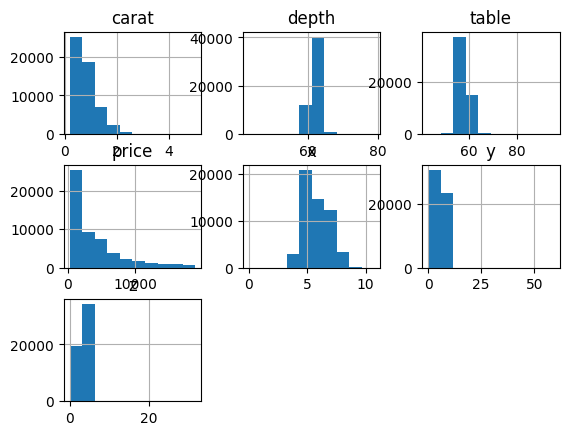

In [8]:
df_processed.hist()
plt.show()

In [9]:
df_processed['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [10]:
df_processed['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [11]:
#Convert to Categorical
df_processed['cut'] = pd.Categorical(df_processed['cut'])
df_processed['color'] = pd.Categorical(df_processed['color'])
df_processed['clarity'] = pd.Categorical(df_processed['clarity'])


In [12]:
# label_encoder = LabelEncoder()

# cat_cols = df_processed.select_dtypes('category').columns
# for column in cat_cols:
#     df_processed[column] = label_encoder.fit_transform(df_processed[column])

In [13]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [14]:
df_processed.to_csv('../data/processed/processed.csv')
df = df_processed.copy()

In [15]:
#Create train Test Split

X = df.drop(['price'], axis=1).copy()
y = df['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=930)

df_train = pd.concat([X_train, y_train], axis=1)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 12252 to 20746
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    43152 non-null  float64 
 1   cut      43152 non-null  category
 2   color    43152 non-null  category
 3   clarity  43152 non-null  category
 4   depth    43152 non-null  float64 
 5   table    43152 non-null  float64 
 6   x        43152 non-null  float64 
 7   y        43152 non-null  float64 
 8   z        43152 non-null  float64 
 9   price    43152 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 2.8 MB


In [16]:
#EDA
df_train.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
11205,1.01,Very Good,H,VS2,61.0,63.0,6.38,6.41,3.90,4959
41446,0.53,Ideal,E,SI2,60.8,57.0,5.23,5.26,3.19,1229
41254,0.30,Ideal,F,SI1,62.3,54.0,4.27,4.30,2.67,500
36850,0.37,Very Good,F,VS2,63.3,56.0,4.63,4.56,2.91,957
12036,0.34,Ideal,G,VS2,62.7,55.0,4.48,4.49,2.81,596
34668,0.31,Premium,E,VS2,61.8,59.0,4.37,4.30,2.68,872
5085,0.90,Good,G,SI1,60.0,61.0,6.19,6.22,3.72,3752
33000,0.44,Very Good,I,VS1,61.9,57.0,4.86,4.89,3.01,813
13292,1.20,Very Good,I,SI2,63.7,56.0,6.66,6.71,4.26,5490
17847,1.07,Ideal,G,VS1,62.0,56.0,6.58,6.52,4.06,7198


In [17]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.795915,0.473172,0.2,0.40,0.70,1.04,5.01
depth,43152.0,61.748834,1.433543,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.458407,2.227969,44.0,56.00,57.00,59.00,95.00
x,43152.0,5.726776,1.120606,0.0,4.71,5.69,6.54,10.74
y,43152.0,5.729832,1.140905,0.0,4.72,5.70,6.53,58.90
z,43152.0,3.535355,0.693752,0.0,2.91,3.52,4.03,8.06
price,43152.0,3918.756489,3981.677584,326.0,948.00,2393.00,5305.25,18823.00


<Axes: >

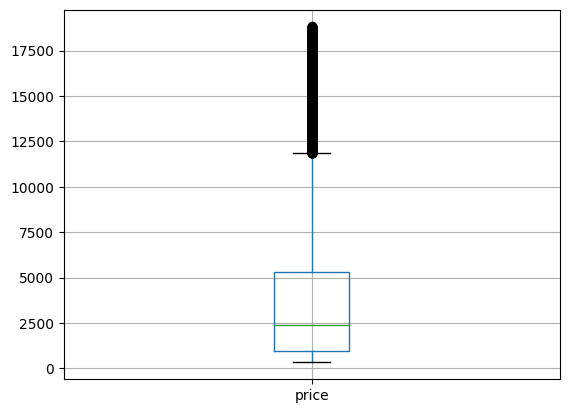

In [18]:
#from previous result, it is visible that the price contains some outliers. It can be confirmed with a Box plot
df_train.boxplot(column='price')

<Axes: >

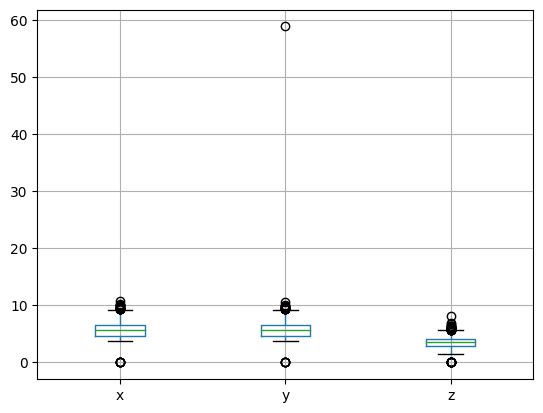

In [19]:
df_train.boxplot(column=['x','y','z']) #It is the same with table, x, y, and z measures.

<Axes: >

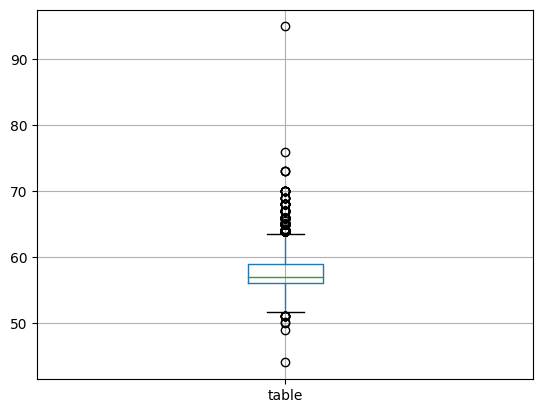

In [20]:
df_train.boxplot(column=['table'])

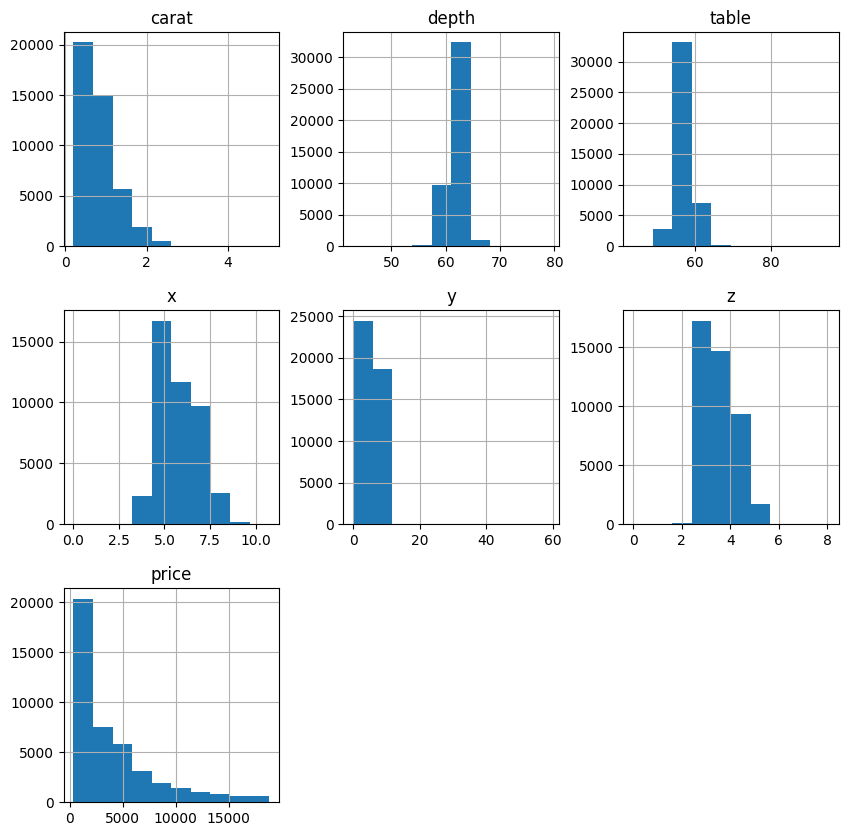

In [21]:
#Analisys for Numerical Variables
df_train.hist(figsize=(10,10))
plt.show()

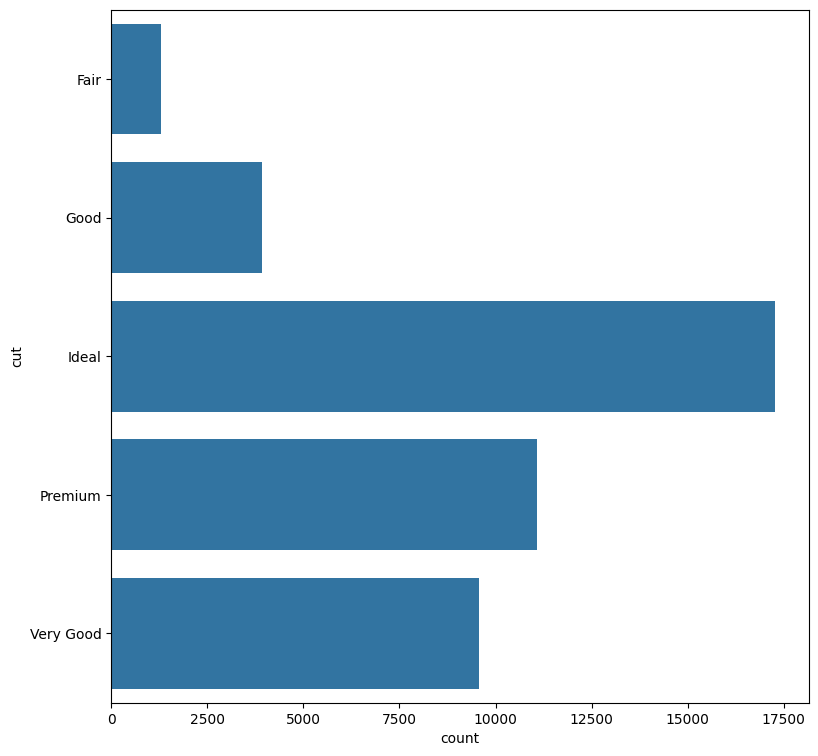

In [22]:
#Analysis (univariate) for Categorical Variables

fig,ax = plt.subplots(1, 1, figsize = (9,9))

sns.countplot(data=df_train, y='cut')

plt.show()

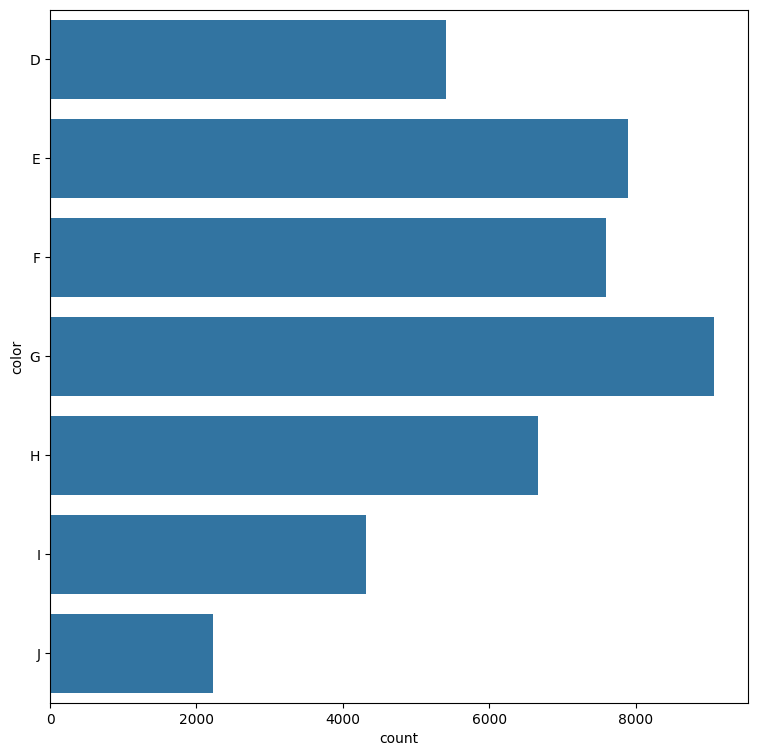

In [23]:
#Analysis (univariate) for Categorical Variables

fig,ax = plt.subplots(1, 1, figsize = (9,9))

sns.countplot(data=df_train, y='color')

plt.show()

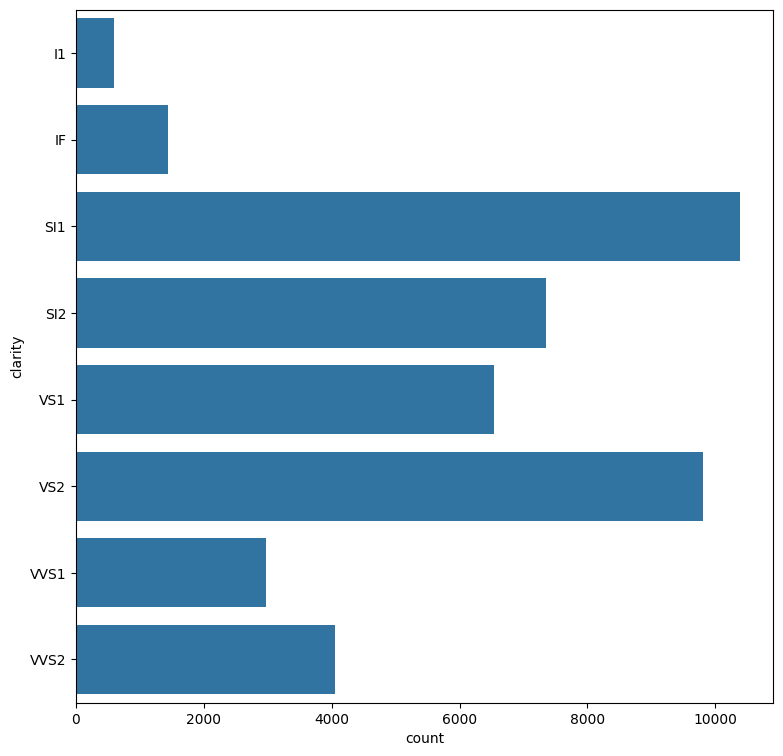

In [24]:
#Analysis (univariate) for Categorical Variables

fig,ax = plt.subplots(1, 1, figsize = (9,9))

sns.countplot(data=df_train, y='clarity')

plt.show()

In [25]:
#Correlation Analysis 
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,carat,depth,table,x,y,z,price
carat,1.000000,0.024390,0.184001,0.975488,0.952790,0.968574,0.921991
depth,0.024390,1.000000,-0.292602,-0.029139,-0.033412,0.092173,-0.014711
table,0.184001,-0.292602,1.000000,0.197992,0.186753,0.157331,0.128891
x,0.975488,-0.029139,0.197992,1.000000,0.975100,0.985958,0.885637
y,0.952790,-0.033412,0.186753,0.975100,1.000000,0.967009,0.867035
z,0.968574,0.092173,0.157331,0.985958,0.967009,1.000000,0.875512
price,0.921991,-0.014711,0.128891,0.885637,0.867035,0.875512,1.000000


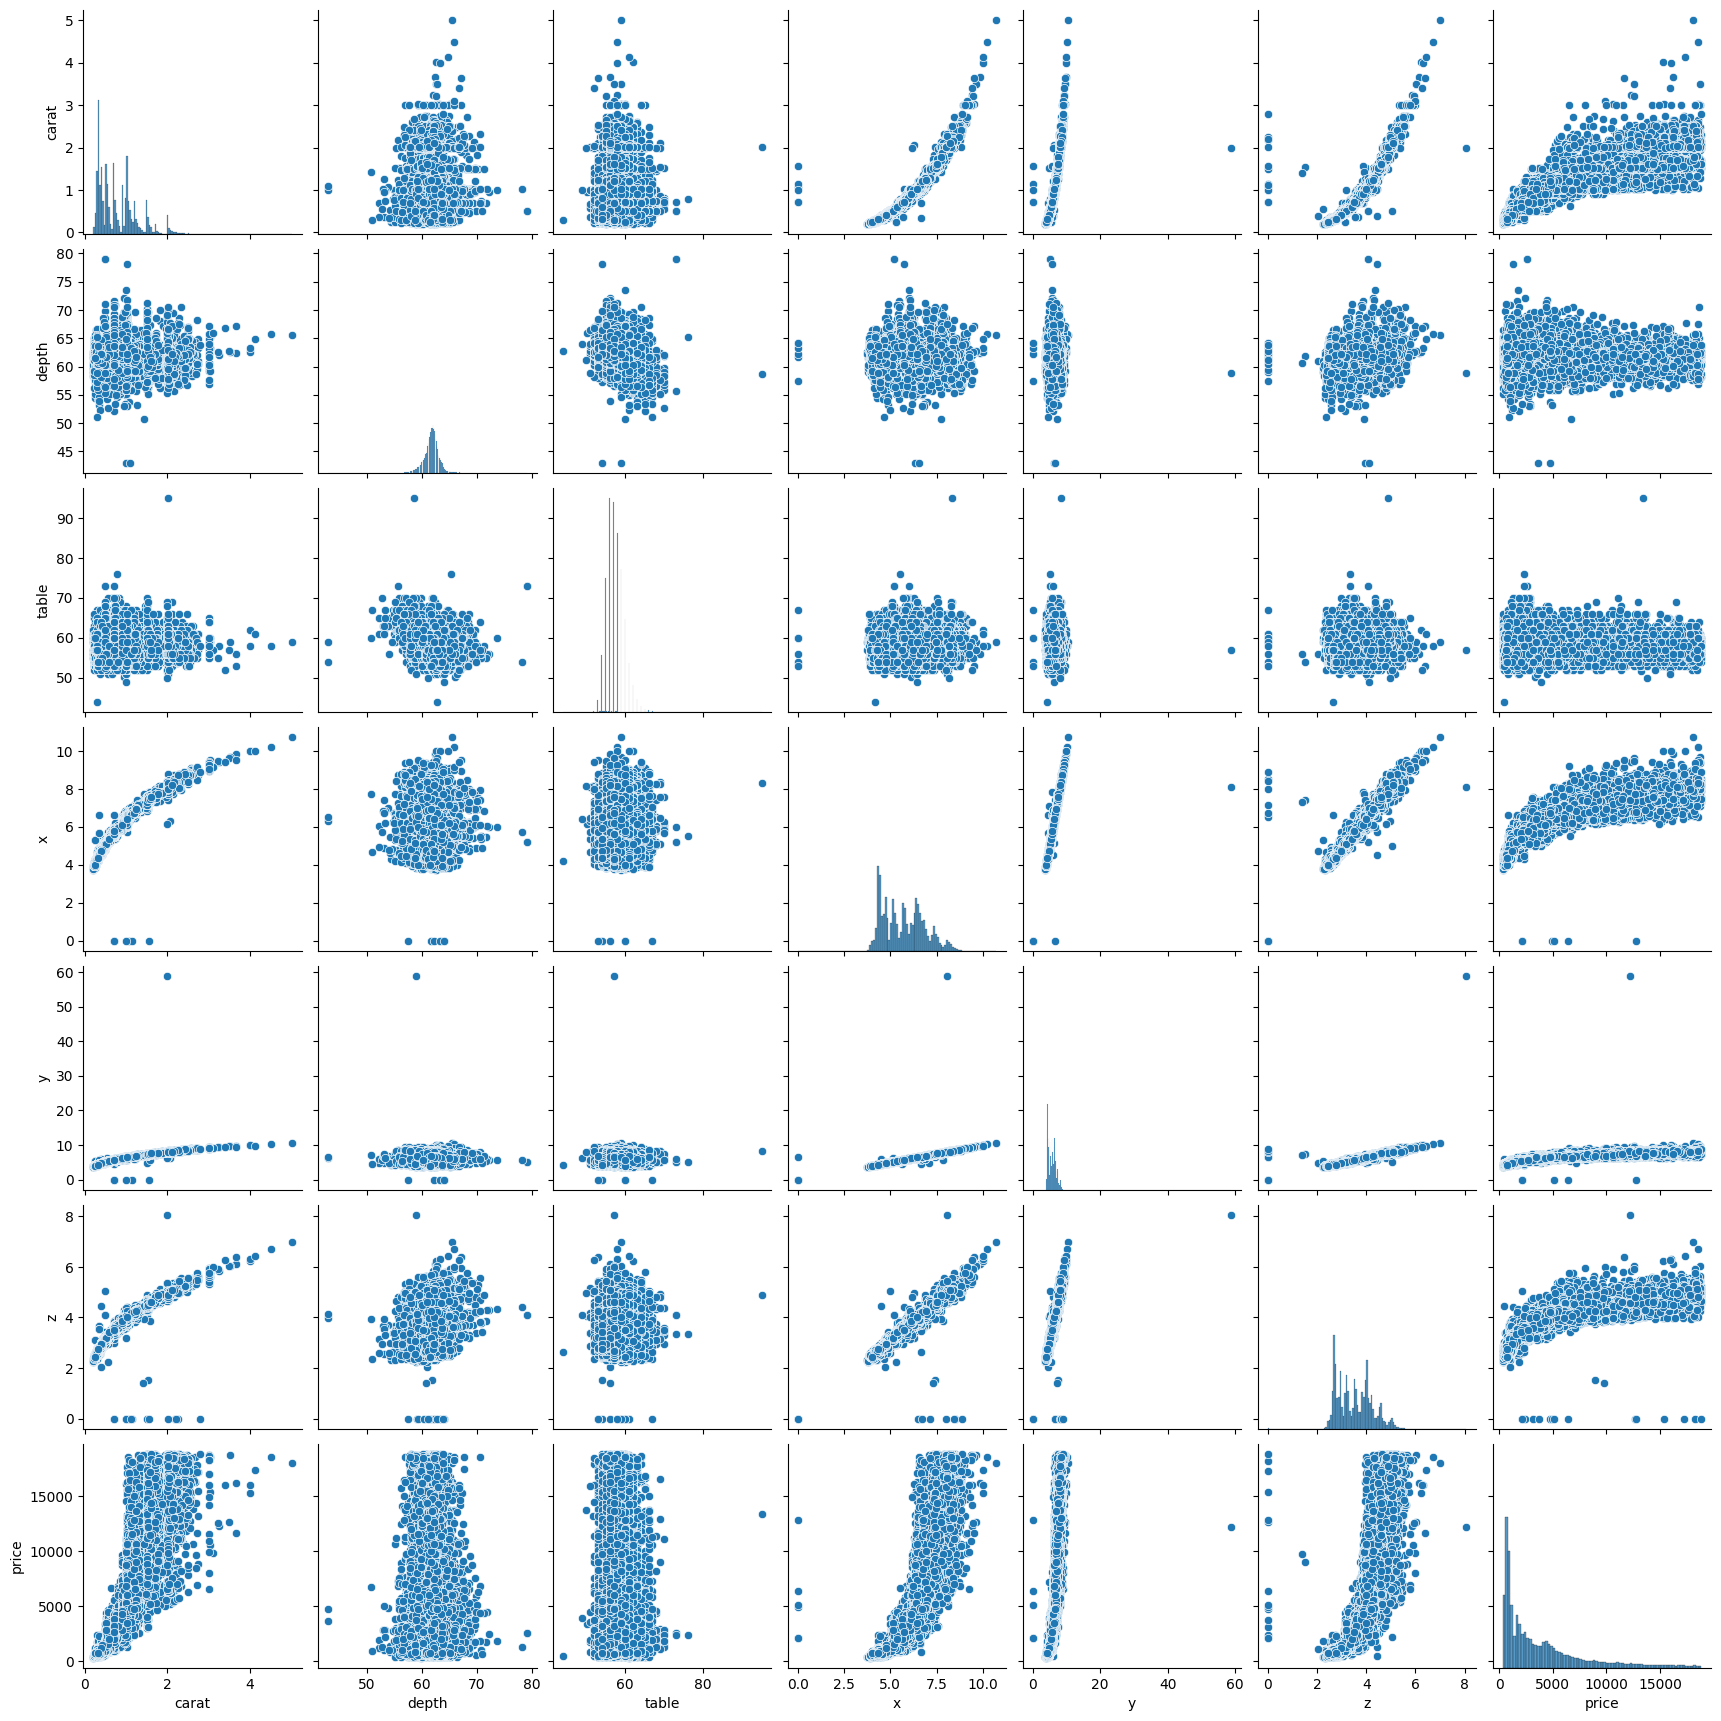

In [26]:
sns.pairplot(data=df_train)
plt.show()

In [27]:
#It is visible that some of the variables have linear relation (e.g. y and z, y and x, price vs y) and some other seems to have a exponential
#logaritmic relation (e.g. z vs carat, price vs x, price vs y )

In [28]:
#Decision Tree Regresson is used as it can handle non linear relationships between variables.

In [29]:
cat_cols = X_train.select_dtypes('category').columns #cat_cols variables categoricas
num_cols = X_train.select_dtypes('number').columns   # num_cols variables numericas

In [30]:
# 4.1. Create Pipeline

cat_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse=False)) #sparse son varias columnas, con false las comprime 
])
#onehot convierte las variables categoricas a numeros.
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())    # escala los datos a una media de cero y un rango unitario (desviación)
])
#StandardScaler se usa este escaler porque las variables son casi simetricas.

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [31]:
#The Casifier is added to the pipeline
decisiontree_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

In [32]:
#Model is fit to the Train Data
decisiontree_regression_model.fit(X_train,y_train)

/home/arnaldochm/Documents/BootCamp_DataScience/Tareas/ml-web-app-using-streamlit-tutorial/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [33]:
X_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [34]:
y_hat_decisiontree = decisiontree_regression_model.predict(X_test)
y_hat_decisiontree

array([13903.,  4414., 18296., ...,   577.,  1982., 16396.])

In [35]:
mse = mean_squared_error(y_test, y_hat_decisiontree)

print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"(R2): {r2_score(y_test, y_hat_decisiontree):.2f}")

Root Mean Squared Error (RMSE): 759.85
(R2): 0.96


In [36]:
import pickle
file_name = '../models/decisiontreeregressor.pkl'
pickle.dump(decisiontree_regression_model, open(file_name, 'wb'))